# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text

In [6]:
# Code Here

# Code Here
!pip install palmerpenguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from palmerpenguins import load_penguins
from plotnine import *

# Load the dataset
penguin = load_penguins()
penguin = penguin.dropna()
# Print the first few rows of the dataset
penguin.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [7]:
# Code Here

# Simple linear regression (e.g. straight-line) model
X = penguin.drop("bill_depth_mm", axis = 1)
y = penguin["bill_depth_mm"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

scores = abs(cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
lr_mse = scores.mean()


In [9]:
X = penguin.drop("bill_depth_mm", axis = 1)
y = penguin["bill_depth_mm"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model_3 = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsRegressor(n_neighbors=3))
]).set_output(transform="pandas")

scores = abs(cross_val_score(knn_model_3, X, y, cv=5, scoring='neg_mean_squared_error'))
knn_3_mse = scores.mean()

In [10]:
X = penguin.drop("bill_depth_mm", axis = 1)
y = penguin["bill_depth_mm"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model_5 = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsRegressor(n_neighbors=5))
]).set_output(transform="pandas")

scores = abs(cross_val_score(knn_model_5, X, y, cv=5, scoring='neg_mean_squared_error'))
knn_5_mse = scores.mean()

In [11]:
X = penguin.drop("bill_depth_mm", axis = 1)
y = penguin["bill_depth_mm"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_pipeline = Pipeline(
    [("preprocessing", ct),
     ("decision_tree", DecisionTreeRegressor(random_state=42))]
).set_output(transform="pandas")

scores = abs(cross_val_score(tree_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
tree_mse = scores.mean()

In [12]:
mse_df = pd.DataFrame({
    "Model": ["Linear", "KNN_3", "KNN_5", "Decision Tree"],
    "MSE": [lr_mse, knn_3_mse, knn_5_mse, tree_mse]
})

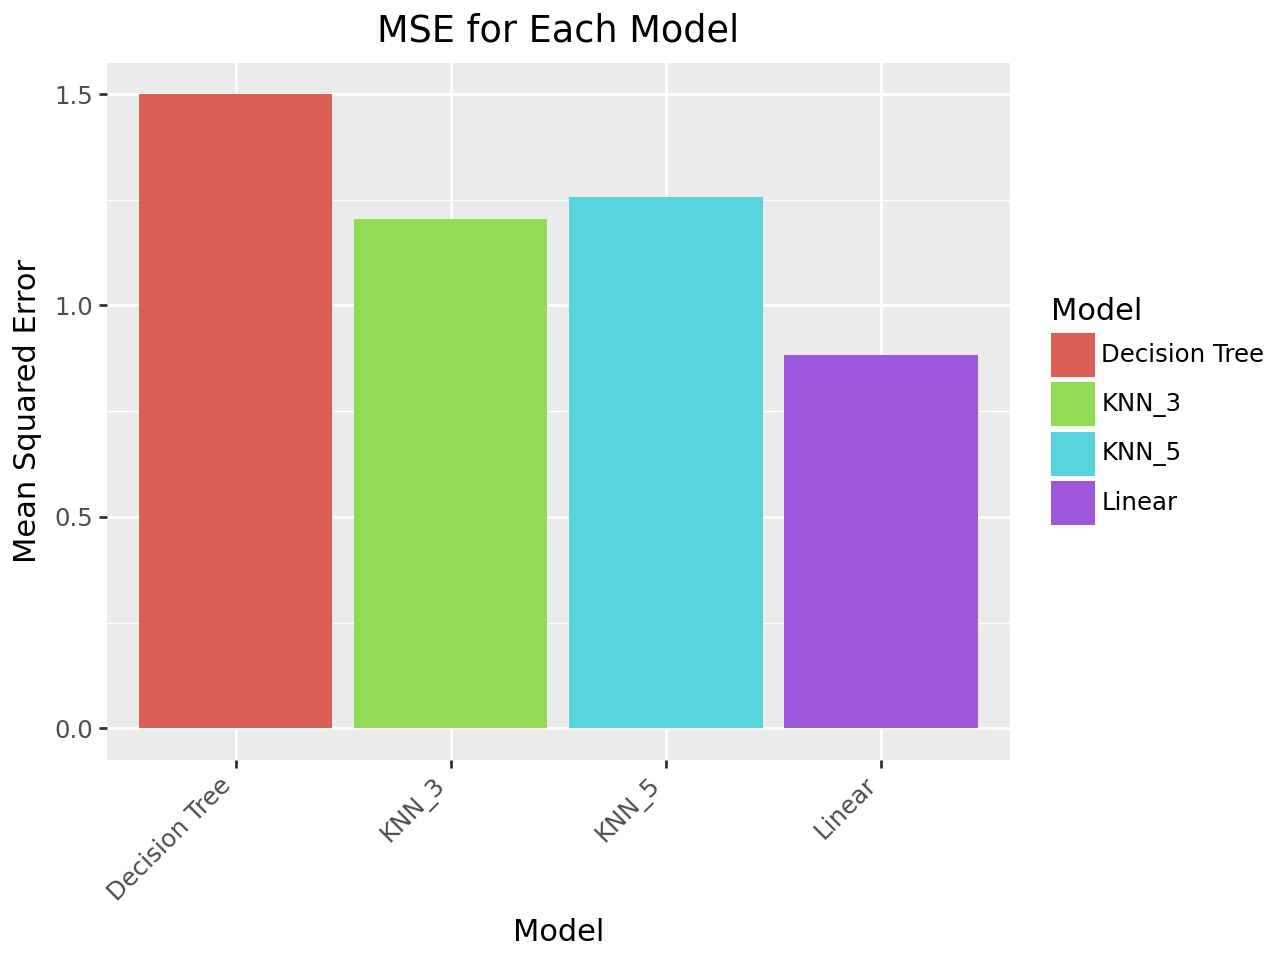

In [13]:
(ggplot(mse_df, aes(x="Model", y="MSE", fill="Model")) +
    geom_bar(stat="identity") +
    labs(title="MSE for Each Model",
         x="Model",
         y="Mean Squared Error") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate model names for readability
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?